# Tutorial 2: Analyzing Linguistic Alignment

This tutorial demonstrates how to analyze linguistic alignment in conversational data using the ALIGN package.

## What You'll Learn

- Computing **lexical-syntactic alignment** (word and grammar similarity)
- Computing **semantic alignment** using FastText embeddings
- Computing **semantic alignment** using BERT embeddings
- Comparing different POS taggers (NLTK, spaCy, Stanford)
- Using multiple analyzers together for comprehensive analysis

## Prerequisites

You should have already:
1. Completed Tutorial 1 (Preprocessing)
2. Have preprocessed files in `./tutorial_output/preprocessed_nltk/`

---
## Step 1: Import and Configure

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the alignment analyzer
from align_test.alignment import LinguisticAlignment

print("✓ Imports successful")

/Users/ndd697/.pyenv/versions/3.13.5/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ Imports successful


In [3]:
# Configure paths
# Input: Preprocessed data from Tutorial 1
INPUT_DIR_NLTK = './tutorial_output/preprocessed_nltk'
INPUT_DIR_SPACY = './tutorial_output/preprocessed_spacy'
INPUT_DIR_STANFORD = './tutorial_output/preprocessed_stanford'

# Output: Where to save alignment results
OUTPUT_DIR = './tutorial_output/alignment_results'

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"Output directory: {OUTPUT_DIR}")

# Verify input data exists
if os.path.exists(INPUT_DIR_NLTK):
    files = [f for f in os.listdir(INPUT_DIR_NLTK) if f.endswith('.txt')]
    print(f"✓ Found {len(files)} preprocessed files")
else:
    print("✗ Preprocessed data not found!")
    print("Please run Tutorial 1 (Preprocessing) first.")

Output directory: ./tutorial_output/alignment_results
✓ Found 21 preprocessed files


---
## Step 2: Lexical-Syntactic Alignment

This analyzes how speakers align in their **word choices** (lexical) and **grammar patterns** (syntactic).

### Key Parameters:
- `lag=1`: Compare each utterance with the next one (turn-by-turn)
- `max_ngram=2`: Analyze both unigrams (single words) and bigrams (word pairs)
- `ignore_duplicates=True`: Ignore repeated n-grams when computing syntactic alignment

### Metrics Computed:
- **Lexical alignment**: Word overlap between speakers
- **Syntactic alignment**: Grammar pattern (POS tag) similarity
- **Master scores**: Averaged alignment across n-gram sizes

In [4]:
# Initialize the lexical-syntactic analyzer
print("Initializing analyzer...\n")

analyzer_lexsyn = LinguisticAlignment(
    alignment_type="lexsyn"
)

print("✓ Analyzer ready")

Initializing analyzer...

✓ Analyzer ready


In [5]:
# Run alignment analysis
print("Analyzing lexical-syntactic alignment...\n")

results_lexsyn = analyzer_lexsyn.analyze_folder(
    folder_path=INPUT_DIR_NLTK,
    output_directory=OUTPUT_DIR,
    lag=1,
    max_ngram=2,
    ignore_duplicates=True,
    add_additional_tags=False  # Using NLTK tags only
)

print(f"\n✓ Analysis complete!")
print(f"Analyzed {len(results_lexsyn)} utterance pairs")

Analyzing lexical-syntactic alignment...

ANALYZE_FOLDER: Processing data from folder: ./tutorial_output/preprocessed_nltk with lag=1
Found 21 files to process with lag 1


Processing files with lexsyn: 100%|██████████| 21/21 [00:01<00:00, 20.22it/s]


Successfully processed 21 out of 21 files
Results saved to ./tutorial_output/alignment_results/lexsyn/lexsyn_alignment_ngram2_lag1_noDups_noAdd.csv

✓ Analysis complete!
Analyzed 3664 utterance pairs


### Examine Results

Let's look at what alignment metrics were computed:

In [9]:
# Show all alignment metrics
alignment_metrics = [col for col in results_lexsyn.columns if 'cosine' in col]

print("Alignment Metrics Computed:\n")
for metric in alignment_metrics:
    print(f"  - {metric}")

print(f"\nSample alignment scores (first utterance pair):")
sample = results_lexsyn.iloc[10]
print(f"\nParticipants: {sample['utter_order']}")
print(f"Content 1: {sample['content1']}")
print(f"Content 2: {sample['content2']}")
print(f"\nLexical alignment: {sample['lexical_master_cosine']:.4f}")
print(f"Syntactic alignment: {sample['syntactic_master_cosine']:.4f}")

Alignment Metrics Computed:

  - lexical_tok1_cosine
  - lexical_lem1_cosine
  - pos_tok1_cosine
  - pos_lem1_cosine
  - lexical_tok2_cosine
  - lexical_lem2_cosine
  - pos_tok2_cosine
  - pos_lem2_cosine
  - lexical_master_cosine
  - syntactic_master_cosine

Sample alignment scores (first utterance pair):

Participants: cgv kid
Content 1: do you want two graham crackers
Content 2: no yeah two mom this thing is almost broken we've been using it too much

Lexical alignment: 0.0496
Syntactic alignment: 0.1055


### Visualize Alignment Distributions

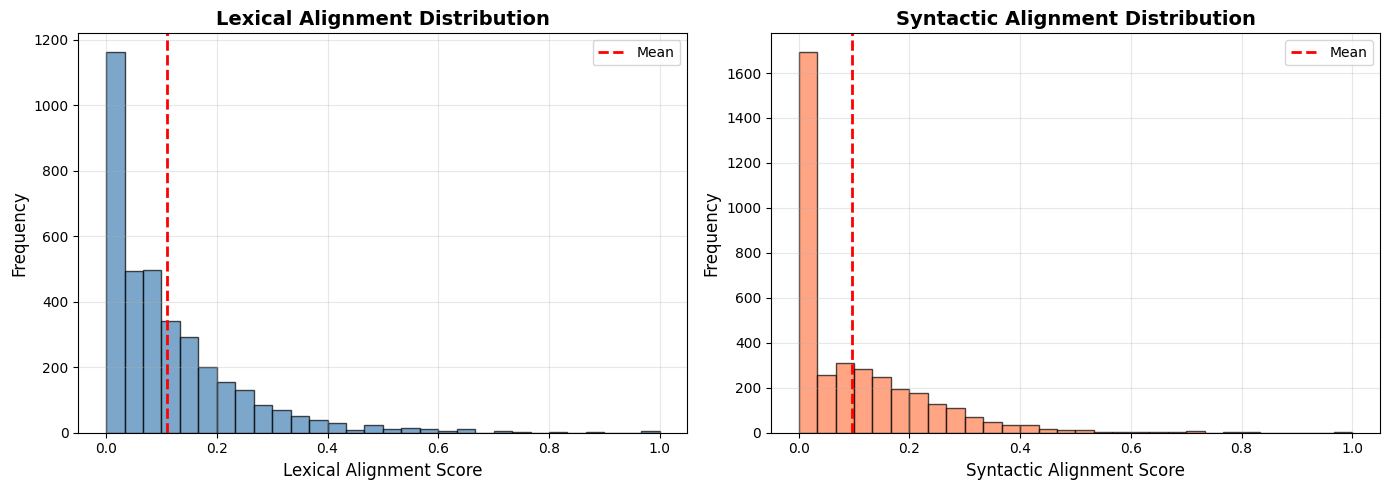


Alignment Statistics:
       lexical_master_cosine  syntactic_master_cosine
count            3643.000000              3643.000000
mean                0.110742                 0.095684
std                 0.127911                 0.123510
min                 0.000000                 0.000000
25%                 0.000000                 0.000000
50%                 0.078623                 0.052705
75%                 0.157273                 0.158114
max                 1.000000                 1.000000


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Lexical alignment
results_lexsyn['lexical_master_cosine'].hist(
    ax=axes[0], bins=30, edgecolor='black', alpha=0.7, color='steelblue'
)
axes[0].set_title('Lexical Alignment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Lexical Alignment Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(results_lexsyn['lexical_master_cosine'].mean(), 
                color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Syntactic alignment
results_lexsyn['syntactic_master_cosine'].hist(
    ax=axes[1], bins=30, edgecolor='black', alpha=0.7, color='coral'
)
axes[1].set_title('Syntactic Alignment Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Syntactic Alignment Score', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].axvline(results_lexsyn['syntactic_master_cosine'].mean(), 
                color='red', linestyle='--', linewidth=2, label='Mean')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("\nAlignment Statistics:")
print("="*60)
print(results_lexsyn[['lexical_master_cosine', 'syntactic_master_cosine']].describe())

---
## Step 3: Comparing Different POS Taggers (Optional)

If you preprocessed with spaCy or Stanford in Tutorial 1, you can compare how different taggers affect alignment scores.

In [11]:
# Check if spaCy preprocessing is available
if os.path.exists(INPUT_DIR_SPACY):
    print("Analyzing with spaCy tags...\n")
    
    results_spacy = analyzer_lexsyn.analyze_folder(
        folder_path=INPUT_DIR_SPACY,
        output_directory=OUTPUT_DIR,
        lag=1,
        max_ngram=2,
        ignore_duplicates=True,
        add_additional_tags=True,
        additional_tagger_type='spacy'
    )
    
    print(f"✓ spaCy analysis complete!")
    
    # Compare syntactic master scores
    print(f"\nSyntactic Alignment Comparison:")
    print(f"  NLTK only:  {results_lexsyn['syntactic_master_cosine'].mean():.4f}")
    print(f"  With spaCy: {results_spacy['syntactic_master_cosine'].mean():.4f}")
    print(f"\nNote: spaCy scores include both NLTK and spaCy POS tags (averaged)")
else:
    print("⊘ spaCy preprocessing not available")
    print("Run Tutorial 1 with spaCy option to enable this comparison")

Analyzing with spaCy tags...

ANALYZE_FOLDER: Processing data from folder: ./tutorial_output/preprocessed_spacy with lag=1
Found 21 files to process with lag 1


Processing files with lexsyn: 100%|██████████| 21/21 [00:01<00:00, 13.26it/s]


Successfully processed 21 out of 21 files
Results saved to ./tutorial_output/alignment_results/lexsyn/lexsyn_alignment_ngram2_lag1_noDups_withSpacy.csv
✓ spaCy analysis complete!

Syntactic Alignment Comparison:
  NLTK only:  0.0957
  With spaCy: 0.1069

Note: spaCy scores include both NLTK and spaCy POS tags (averaged)


---
## Step 4: Semantic Alignment with FastText

FastText analyzes **semantic similarity** - whether speakers use words with similar meanings, even if the exact words differ.

### First Run:
- Downloads FastText model (~1-2 GB)
- May take several minutes
- Model is cached for future use

### What It Does:
- Converts words to 300-dimensional vectors
- Compares vector similarity between utterances
- Filters vocabulary to focus on content words

In [17]:
# Initialize FastText analyzer
print("Initializing FastText analyzer...\n")
print("\n⚠️  Note: First run will download FastText model (~1-2 GB). This may take several minutes...\n")

analyzer_fasttext = LinguisticAlignment(
    alignment_type="fasttext",
    cache_dir=os.path.join(OUTPUT_DIR, "cache")
)

print("\n✓ Analyzer ready. Next run will be much faster since the model is cached.\n")

Initializing FastText analyzer...


⚠️  Note: First run will download FastText model (~1-2 GB). This may take several minutes...

Loading model: fasttext-wiki-news-300
Using model cache directory: ./tutorial_output/alignment_results/cache
Loading cached model from: ./tutorial_output/alignment_results/cache/fasttext-wiki-news-300.kv
Using model cache directory: ./tutorial_output/alignment_results/cache
Using embedding cache: ./tutorial_output/alignment_results/cache/fasttext-wiki-news-300_embedding_cache.pkl

✓ Analyzer ready. Next run will be much faster since the model is cached.



In [18]:
# Run FastText semantic alignment
print("\nAnalyzing semantic alignment with FastText...\n")

results_fasttext = analyzer_fasttext.analyze_folder(
    folder_path=INPUT_DIR_NLTK,
    output_directory=OUTPUT_DIR,
    lag=1,
    high_sd_cutoff=3,  # Exclude very common words
    low_n_cutoff=1     # Exclude very rare words
)

print(f"\n✓ FastText analysis complete!")
print(f"Analyzed {len(results_fasttext)} utterance pairs")


Analyzing semantic alignment with FastText...

ANALYZE_FOLDER: Processing data from folder: ./tutorial_output/preprocessed_nltk with lag=1
Found 21 files to process with lag 1
Building vocabulary from all files...
Built vocabulary with 1458 total words and 1438 filtered words


Processing files with fasttext-wiki-news-300:   0%|          | 0/21 [00:00<?, ?it/s]

Computing embeddings for time197-cond1.txt...


Processing lemma2: 100%|██████████| 76/76 [00:00<00:00, 19357.93it/s]


Embeddings computed: {'content': 151, 'token': 151, 'lemma': 151}
Computed 75 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 75 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 75 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 453 entries
Computing embeddings for time202-cond1.txt...


Processing files with fasttext-wiki-news-300:  10%|▉         | 2/21 [00:00<00:01, 12.33it/s]

Embeddings computed: {'content': 183, 'token': 183, 'lemma': 183}
Computed 91 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 91 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 91 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 1002 entries
Computing embeddings for time191-cond1.txt...


Processing lemma2: 100%|██████████| 99/99 [00:00<00:00, 22515.78it/s]

Embeddings computed: {'content': 197, 'token': 197, 'lemma': 197}
Computed 98 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 98 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 98 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Saved embedding cache with 1593 entries
Computing embeddings for time209-cond1.txt...


Processing lemma2: 100%|██████████| 98/98 [00:00<00:00, 20510.04it/s]


Embeddings computed: {'content': 195, 'token': 195, 'lemma': 195}
Computed 97 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 97 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 97 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  19%|█▉        | 4/21 [00:00<00:01, 10.88it/s]

Saved embedding cache with 2178 entries
Computing embeddings for time210-cond1.txt...


Processing lemma2: 100%|██████████| 100/100 [00:00<00:00, 21682.71it/s]


Embeddings computed: {'content': 199, 'token': 199, 'lemma': 199}
Computed 99 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 99 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 99 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 2769 entries
Computing embeddings for time204-cond1.txt...


Processing lemma2: 100%|██████████| 143/143 [00:00<00:00, 22591.64it/s]


Embeddings computed: {'content': 285, 'token': 285, 'lemma': 285}
Computed 142 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 142 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 142 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  29%|██▊       | 6/21 [00:00<00:01,  9.70it/s]

Saved embedding cache with 3624 entries
Computing embeddings for time196-cond1.txt...


Processing lemma2: 100%|██████████| 66/66 [00:00<00:00, 23851.81it/s]


Embeddings computed: {'content': 131, 'token': 131, 'lemma': 131}
Computed 65 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 65 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 65 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 4017 entries
Computing embeddings for time203-cond1.txt...


Processing files with fasttext-wiki-news-300:  38%|███▊      | 8/21 [00:00<00:01, 10.39it/s]

Embeddings computed: {'content': 179, 'token': 179, 'lemma': 179}
Computed 89 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 4554 entries
Computing embeddings for time208-cond1.txt...


Processing lemma2: 100%|██████████| 86/86 [00:00<00:00, 21570.99it/s]


Embeddings computed: {'content': 171, 'token': 171, 'lemma': 171}
Computed 85 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 85 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 85 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 5067 entries
Computing embeddings for time205-cond1.txt...


Processing lemma2: 100%|██████████| 106/106 [00:00<00:00, 19268.28it/s]


Embeddings computed: {'content': 211, 'token': 211, 'lemma': 211}
Computed 105 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 105 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 105 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  48%|████▊     | 10/21 [00:00<00:01, 10.10it/s]

Saved embedding cache with 5700 entries
Computing embeddings for time195-cond1.txt...


Processing lemma2: 100%|██████████| 90/90 [00:00<00:00, 14732.36it/s]


Embeddings computed: {'content': 179, 'token': 179, 'lemma': 179}
Computed 89 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 6237 entries
Computing embeddings for time198-cond1.txt...


Processing lemma2: 100%|██████████| 89/89 [00:00<00:00, 22595.06it/s]


Embeddings computed: {'content': 177, 'token': 177, 'lemma': 177}
Computed 88 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 88 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 88 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 6768 entries


Processing files with fasttext-wiki-news-300:  57%|█████▋    | 12/21 [00:01<00:00, 10.04it/s]

Computing embeddings for time200-cond1.txt...


Processing lemma2: 100%|██████████| 78/78 [00:00<00:00, 20494.63it/s]


Embeddings computed: {'content': 155, 'token': 155, 'lemma': 155}
Computed 77 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 77 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 77 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 7231 entries
Computing embeddings for time193-cond1.txt...


Processing lemma2: 100%|██████████| 95/95 [00:00<00:00, 22298.89it/s]


Embeddings computed: {'content': 189, 'token': 189, 'lemma': 189}
Computed 94 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 94 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 94 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 7798 entries


Processing files with fasttext-wiki-news-300:  67%|██████▋   | 14/21 [00:01<00:00, 10.01it/s]

Computing embeddings for time206-cond1.txt...


Processing lemma2: 100%|██████████| 97/97 [00:00<00:00, 22202.98it/s]


Embeddings computed: {'content': 193, 'token': 193, 'lemma': 193}
Computed 96 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 96 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 96 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 8377 entries
Computing embeddings for time194-cond1.txt...


Processing lemma2: 100%|██████████| 77/77 [00:00<00:00, 21260.05it/s]


Embeddings computed: {'content': 153, 'token': 153, 'lemma': 153}
Computed 76 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 76 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 76 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  76%|███████▌  | 16/21 [00:01<00:00,  9.97it/s]

Saved embedding cache with 8830 entries
Computing embeddings for time199-cond1.txt...


Processing lemma2: 100%|██████████| 87/87 [00:00<00:00, 21717.92it/s]


Embeddings computed: {'content': 173, 'token': 173, 'lemma': 173}
Computed 86 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 86 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 86 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 9349 entries
Computing embeddings for align_concatenated_dataframe.txt...


Processing files with fasttext-wiki-news-300:  86%|████████▌ | 18/21 [00:03<00:00,  3.29it/s]

Embeddings computed: {'content': 3663, 'token': 3663, 'lemma': 3663}
Computed 1831 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 1831 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 1831 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 19885 entries
Computing embeddings for time201-cond1.txt...


Processing files with fasttext-wiki-news-300:  90%|█████████ | 19/21 [00:03<00:00,  3.70it/s]

Embeddings computed: {'content': 179, 'token': 179, 'lemma': 179}
Computed 89 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 20422 entries
Computing embeddings for time192-cond1.txt...


Processing lemma2: 100%|██████████| 67/67 [00:00<00:00, 20910.66it/s]


Embeddings computed: {'content': 133, 'token': 133, 'lemma': 133}
Computed 66 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 66 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 66 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  95%|█████████▌| 20/21 [00:03<00:00,  3.81it/s]

Saved embedding cache with 20821 entries
Computing embeddings for time207-cond1.txt...


Processing files with fasttext-wiki-news-300: 100%|██████████| 21/21 [00:03<00:00,  5.88it/s]

Embeddings computed: {'content': 211, 'token': 211, 'lemma': 211}
Computed 105 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 105 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 105 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 21448 entries
Successfully processed 21 out of 21 files
Results saved to ./tutorial_output/alignment_results/fasttext/semantic_alignment_fasttext_lag1_sd3_n1.csv

✓ FastText analysis complete!
Analyzed 3664 utterance pairs


FastText Metrics Computed:

  - fasttext-wiki-news-300_cosine_similarity
  - token_fasttext-wiki-news-300_cosine_similarity
  - lemma_fasttext-wiki-news-300_cosine_similarity
  - master_fasttext-wiki-news-300_cosine_similarity


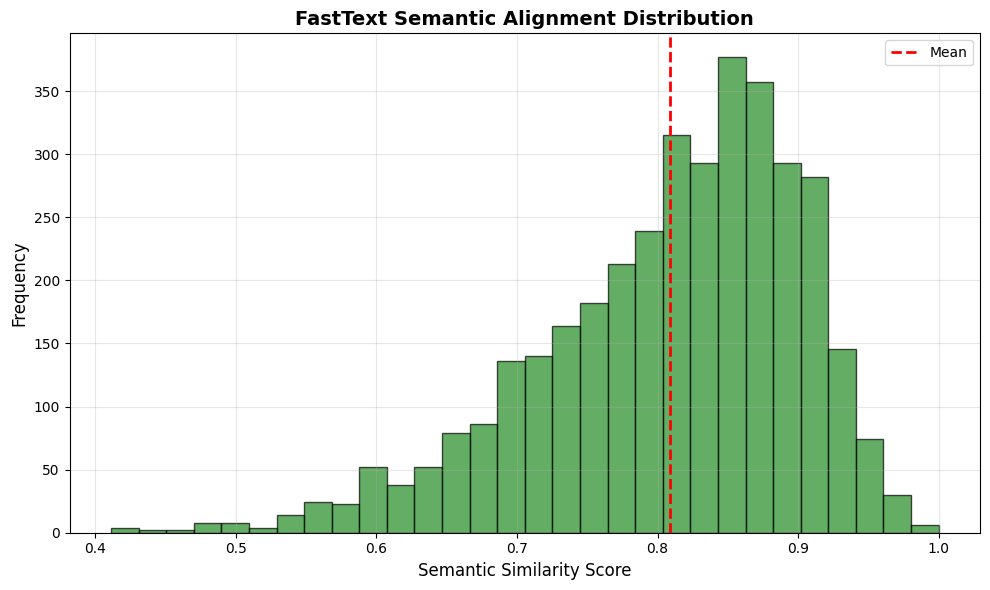


Mean semantic similarity: 0.8088


In [19]:
# Examine FastText metrics
fasttext_metrics = [col for col in results_fasttext.columns if 'fasttext' in col and 'cosine' in col]

print("FastText Metrics Computed:\n")
for metric in fasttext_metrics:
    print(f"  - {metric}")

# Visualize semantic alignment
master_metric = [m for m in fasttext_metrics if 'master' in m.lower()][0]

plt.figure(figsize=(10, 6))
results_fasttext[master_metric].hist(bins=30, edgecolor='black', alpha=0.7, color='forestgreen')
plt.title('FastText Semantic Alignment Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Semantic Similarity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(results_fasttext[master_metric].mean(), 
            color='red', linestyle='--', linewidth=2, label='Mean')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nMean semantic similarity: {results_fasttext[master_metric].mean():.4f}")

---
## Step 5: Semantic Alignment with BERT (Optional)

BERT provides **contextual semantic analysis** - understanding meaning based on surrounding words.

### Prerequisites:

#### Get a Hugging Face Token:
1. Go to: https://huggingface.co/settings/tokens
2. Click 'New token' → Copy token
3. Set environment variable:

**macOS/Linux:**
```bash
# Add to ~/.zshrc or ~/.bash_profile
export HUGGINGFACE_TOKEN='your_token_here'
```

**Windows:**
```bash
setx HUGGINGFACE_TOKEN "your_token_here"
```

4. Restart Jupyter for changes to take effect

In [20]:
# Check for Hugging Face token
token_available = 'HUGGINGFACE_TOKEN' in os.environ

if token_available:
    print("✓ Hugging Face token found")
    print("Ready to use BERT!")
else:
    print("✗ Hugging Face token not found")
    print("\nPlease see the setup instructions above.")
    print("After setting the token, restart Jupyter and re-run this cell.")

✓ Hugging Face token found
Ready to use BERT!


In [21]:
if token_available:
    print("Initializing BERT analyzer...\n")
    
    analyzer_bert = LinguisticAlignment(
        alignment_type="bert",
        model_name="bert-base-uncased",
        token=os.environ.get('HUGGINGFACE_TOKEN')
    )
    
    print("Analyzing semantic alignment with BERT...\n")
    
    results_bert = analyzer_bert.analyze_folder(
        folder_path=INPUT_DIR_NLTK,
        output_directory=OUTPUT_DIR,
        lag=1
    )
    
    print(f"\n✓ BERT analysis complete!")
    print(f"Mean semantic similarity: {results_bert['bert-base-uncased_cosine_similarity'].mean():.4f}")
else:
    print("⊘ Skipping BERT analysis (token not available)")

Initializing BERT analyzer...

Analyzing semantic alignment with BERT...

ANALYZE_FOLDER: Processing data from folder: ./tutorial_output/preprocessed_nltk with lag=1
Found 21 files to process with lag 1


Processing files with bert-base-uncased:   0%|          | 0/21 [00:00<?, ?it/s]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time197-cond1.txt...


Processing files with bert-base-uncased:   5%|▍         | 1/21 [00:02<00:50,  2.55s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time202-cond1.txt...


Processing files with bert-base-uncased:  10%|▉         | 2/21 [00:05<00:50,  2.63s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time191-cond1.txt...


Processing files with bert-base-uncased:  14%|█▍        | 3/21 [00:08<00:48,  2.71s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time209-cond1.txt...


Processing files with bert-base-uncased:  19%|█▉        | 4/21 [00:10<00:47,  2.78s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time210-cond1.txt...


Processing files with bert-base-uncased:  24%|██▍       | 5/21 [00:13<00:45,  2.84s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time204-cond1.txt...


Processing files with bert-base-uncased:  29%|██▊       | 6/21 [00:18<00:49,  3.29s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time196-cond1.txt...


Processing files with bert-base-uncased:  33%|███▎      | 7/21 [00:19<00:39,  2.85s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time203-cond1.txt...


Processing files with bert-base-uncased:  38%|███▊      | 8/21 [00:22<00:36,  2.77s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time208-cond1.txt...


Processing files with bert-base-uncased:  43%|████▎     | 9/21 [00:25<00:32,  2.69s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time205-cond1.txt...


Processing files with bert-base-uncased:  48%|████▊     | 10/21 [00:28<00:30,  2.80s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time195-cond1.txt...


Processing files with bert-base-uncased:  52%|█████▏    | 11/21 [00:30<00:27,  2.76s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time198-cond1.txt...


Processing files with bert-base-uncased:  57%|█████▋    | 12/21 [00:33<00:24,  2.72s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time200-cond1.txt...


Processing files with bert-base-uncased:  62%|██████▏   | 13/21 [00:35<00:20,  2.58s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time193-cond1.txt...


Processing files with bert-base-uncased:  67%|██████▋   | 14/21 [00:38<00:18,  2.62s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time206-cond1.txt...


Processing files with bert-base-uncased:  71%|███████▏  | 15/21 [00:41<00:16,  2.68s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time194-cond1.txt...


Processing files with bert-base-uncased:  76%|███████▌  | 16/21 [00:43<00:12,  2.56s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time199-cond1.txt...


Processing files with bert-base-uncased:  81%|████████  | 17/21 [00:46<00:10,  2.55s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/align_concatenated_dataframe.txt...


Processing files with bert-base-uncased:  86%|████████▌ | 18/21 [01:38<00:52, 17.60s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time201-cond1.txt...


Processing files with bert-base-uncased:  90%|█████████ | 19/21 [01:41<00:26, 13.09s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time192-cond1.txt...


Processing files with bert-base-uncased:  95%|█████████▌| 20/21 [01:43<00:09,  9.73s/it]

Computing embeddings for ./tutorial_output/preprocessed_nltk/time207-cond1.txt...


Processing files with bert-base-uncased: 100%|██████████| 21/21 [01:46<00:00,  5.06s/it]

Successfully processed 21 out of 21 files
Results saved to ./tutorial_output/alignment_results/bert/semantic_alignment_bert-base-uncased_lag1.csv

✓ BERT analysis complete!
Mean semantic similarity: 0.5893


---
## Step 6: Multi-Analyzer Comprehensive Analysis

You can run **multiple analyzers simultaneously** and get merged results with all metrics in one dataframe.

This is useful for:
- Comparing lexical vs. semantic alignment
- Getting a comprehensive view of all alignment types
- Analyzing correlations between different alignment measures

In [22]:
# Initialize combined analyzer with multiple types
print("Initializing multi-analyzer (LexSyn + FastText)...\n")

analyzer_combined = LinguisticAlignment(
    alignment_types=["lexsyn", "fasttext"],  # List of types
    cache_dir=os.path.join(OUTPUT_DIR, "cache")
)

print("✓ Multi-analyzer ready")
print(f"Will compute both lexical-syntactic AND semantic alignment")

Initializing multi-analyzer (LexSyn + FastText)...

Loaded embedding cache with 21448 entries
Loading model: fasttext-wiki-news-300
Using model cache directory: ./tutorial_output/alignment_results/cache
Loading cached model from: ./tutorial_output/alignment_results/cache/fasttext-wiki-news-300.kv
Using model cache directory: ./tutorial_output/alignment_results/cache
Using embedding cache: ./tutorial_output/alignment_results/cache/fasttext-wiki-news-300_embedding_cache.pkl
✓ Multi-analyzer ready
Will compute both lexical-syntactic AND semantic alignment


In [23]:
# Run combined analysis
print("\nRunning comprehensive multi-analyzer analysis...\n")

results_combined = analyzer_combined.analyze_folder(
    folder_path=INPUT_DIR_NLTK,
    output_directory=OUTPUT_DIR,
    lag=1,
    max_ngram=2,              # For LexSyn
    ignore_duplicates=True,   # For LexSyn
    high_sd_cutoff=3,         # For FastText
    low_n_cutoff=1            # For FastText
)

print(f"\n✓ Multi-analyzer analysis complete!")
print(f"Combined results: {results_combined.shape[0]} rows × {results_combined.shape[1]} columns")


Running comprehensive multi-analyzer analysis...

ANALYZE_FOLDER: Processing data from folder: ./tutorial_output/preprocessed_nltk with lag=1
Found 21 files to process with lag 1


Processing files with lexsyn: 100%|██████████| 21/21 [00:01<00:00, 18.87it/s]


Successfully processed 21 out of 21 files
Results saved to ./tutorial_output/alignment_results/lexsyn/lexsyn_alignment_ngram2_lag1_noDups_noAdd.csv
Found 21 files to process with lag 1
Building vocabulary from all files...
Built vocabulary with 1458 total words and 1438 filtered words


Processing files with fasttext-wiki-news-300:   0%|          | 0/21 [00:00<?, ?it/s]

Computing embeddings for time197-cond1.txt...


Processing lemma2: 100%|██████████| 76/76 [00:00<00:00, 36911.43it/s]


Embeddings computed: {'content': 151, 'token': 151, 'lemma': 151}
Computed 75 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 75 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 75 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:   5%|▍         | 1/21 [00:00<00:02,  8.83it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time202-cond1.txt...


Processing lemma2: 100%|██████████| 92/92 [00:00<00:00, 29074.44it/s]


Embeddings computed: {'content': 183, 'token': 183, 'lemma': 183}
Computed 91 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 91 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 91 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  10%|▉         | 2/21 [00:00<00:02,  7.90it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time191-cond1.txt...


Processing lemma2: 100%|██████████| 99/99 [00:00<00:00, 32491.09it/s]

Embeddings computed: {'content': 197, 'token': 197, 'lemma': 197}
Computed 98 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 98 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 98 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  14%|█▍        | 3/21 [00:00<00:02,  7.99it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time209-cond1.txt...


Processing lemma2: 100%|██████████| 98/98 [00:00<00:00, 35646.67it/s]

Embeddings computed: {'content': 195, 'token': 195, 'lemma': 195}
Computed 97 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 97 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 97 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  19%|█▉        | 4/21 [00:00<00:02,  8.00it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time210-cond1.txt...


Processing lemma2: 100%|██████████| 100/100 [00:00<00:00, 33681.07it/s]

Embeddings computed: {'content': 199, 'token': 199, 'lemma': 199}
Computed 99 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 99 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 99 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  24%|██▍       | 5/21 [00:00<00:01,  8.02it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time204-cond1.txt...


Processing lemma2: 100%|██████████| 143/143 [00:00<00:00, 34887.48it/s]

Embeddings computed: {'content': 285, 'token': 285, 'lemma': 285}
Computed 142 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 142 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 142 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  29%|██▊       | 6/21 [00:00<00:02,  7.45it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time196-cond1.txt...


Processing lemma2: 100%|██████████| 66/66 [00:00<00:00, 32151.46it/s]

Embeddings computed: {'content': 131, 'token': 131, 'lemma': 131}
Computed 65 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 65 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 65 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  33%|███▎      | 7/21 [00:00<00:01,  8.02it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time203-cond1.txt...


Processing lemma2: 100%|██████████| 90/90 [00:00<00:00, 29113.63it/s]


Embeddings computed: {'content': 179, 'token': 179, 'lemma': 179}
Computed 89 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  38%|███▊      | 8/21 [00:01<00:01,  8.00it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time208-cond1.txt...


Processing lemma2: 100%|██████████| 86/86 [00:00<00:00, 35422.78it/s]

Embeddings computed: {'content': 171, 'token': 171, 'lemma': 171}
Computed 85 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 85 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 85 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  43%|████▎     | 9/21 [00:01<00:01,  8.12it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time205-cond1.txt...


Processing lemma2: 100%|██████████| 106/106 [00:00<00:00, 35448.59it/s]

Embeddings computed: {'content': 211, 'token': 211, 'lemma': 211}
Computed 105 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 105 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 105 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  48%|████▊     | 10/21 [00:01<00:01,  7.96it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time195-cond1.txt...


Processing lemma2: 100%|██████████| 90/90 [00:00<00:00, 34711.48it/s]

Embeddings computed: {'content': 179, 'token': 179, 'lemma': 179}
Computed 89 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  52%|█████▏    | 11/21 [00:01<00:01,  8.09it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time198-cond1.txt...


Processing lemma2: 100%|██████████| 89/89 [00:00<00:00, 34712.02it/s]

Embeddings computed: {'content': 177, 'token': 177, 'lemma': 177}
Computed 88 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 88 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 88 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  57%|█████▋    | 12/21 [00:01<00:01,  8.22it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time200-cond1.txt...


Processing lemma2: 100%|██████████| 78/78 [00:00<00:00, 35963.03it/s]


Embeddings computed: {'content': 155, 'token': 155, 'lemma': 155}
Computed 77 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 77 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 77 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  62%|██████▏   | 13/21 [00:01<00:00,  8.40it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time193-cond1.txt...


Processing lemma2: 100%|██████████| 95/95 [00:00<00:00, 29634.01it/s]

Embeddings computed: {'content': 189, 'token': 189, 'lemma': 189}
Computed 94 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 94 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 94 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  67%|██████▋   | 14/21 [00:01<00:00,  8.11it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time206-cond1.txt...


Processing lemma2: 100%|██████████| 97/97 [00:00<00:00, 36087.24it/s]

Embeddings computed: {'content': 193, 'token': 193, 'lemma': 193}
Computed 96 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 96 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 96 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  71%|███████▏  | 15/21 [00:01<00:00,  8.06it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time194-cond1.txt...


Processing lemma2: 100%|██████████| 77/77 [00:00<00:00, 34545.02it/s]

Embeddings computed: {'content': 153, 'token': 153, 'lemma': 153}
Computed 76 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 76 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 76 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics



Processing files with fasttext-wiki-news-300:  76%|███████▌  | 16/21 [00:01<00:00,  8.31it/s]

Saved embedding cache with 21448 entries
Computing embeddings for time199-cond1.txt...


Processing lemma2: 100%|██████████| 87/87 [00:00<00:00, 36399.45it/s]


Embeddings computed: {'content': 173, 'token': 173, 'lemma': 173}
Computed 86 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 86 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 86 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300:  81%|████████  | 17/21 [00:02<00:00,  8.40it/s]

Saved embedding cache with 21448 entries
Computing embeddings for align_concatenated_dataframe.txt...


Processing files with fasttext-wiki-news-300:  86%|████████▌ | 18/21 [00:03<00:01,  2.15it/s]

Embeddings computed: {'content': 3663, 'token': 3663, 'lemma': 3663}
Computed 1831 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 1831 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 1831 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 21448 entries
Computing embeddings for time201-cond1.txt...


Processing files with fasttext-wiki-news-300:  90%|█████████ | 19/21 [00:03<00:00,  2.77it/s]

Embeddings computed: {'content': 179, 'token': 179, 'lemma': 179}
Computed 89 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 89 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 21448 entries
Computing embeddings for time192-cond1.txt...


Processing files with fasttext-wiki-news-300:  95%|█████████▌| 20/21 [00:03<00:00,  3.50it/s]

Embeddings computed: {'content': 133, 'token': 133, 'lemma': 133}
Computed 66 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 66 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 66 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics
Saved embedding cache with 21448 entries
Computing embeddings for time207-cond1.txt...


Processing lemma2: 100%|██████████| 106/106 [00:00<00:00, 33789.04it/s]


Embeddings computed: {'content': 211, 'token': 211, 'lemma': 211}
Computed 105 similarity scores for content_fasttext-wiki-news-300_cosine_similarity
Computed 105 similarity scores for token_fasttext-wiki-news-300_cosine_similarity
Computed 105 similarity scores for lemma_fasttext-wiki-news-300_cosine_similarity
Similarity scores computed for 3 metrics


Processing files with fasttext-wiki-news-300: 100%|██████████| 21/21 [00:03<00:00,  5.64it/s]


Saved embedding cache with 21448 entries
Successfully processed 21 out of 21 files
Results saved to ./tutorial_output/alignment_results/fasttext/semantic_alignment_fasttext_lag1_sd3_n1.csv
Merged results from lexsyn, fasttext saved to ./tutorial_output/alignment_results/merged-lag1-ngram2-noAdd-noDups-sd3-n1.csv

✓ Multi-analyzer analysis complete!
Combined results: 3664 rows × 44 columns


In [ ]:
# Show all metrics in combined results
print("\nAll Metrics in Combined Results:\n")

# Lexical-syntactic metrics
lexsyn_metrics = [col for col in results_combined.columns 
                  if any(x in col for x in ['lexical_', 'syntactic_', 'pos_'])]
print("Lexical-Syntactic Metrics:")
for m in lexsyn_metrics:
    print(f"  - {m}")

# Semantic metrics
semantic_metrics = [col for col in results_combined.columns if 'fasttext' in col]
print(f"\nSemantic (FastText) Metrics:")
for m in semantic_metrics:
    print(f"  - {m}")

# Show sample scores
print("\n" + "="*60)
print("Sample Comprehensive Alignment Scores (First Utterance Pair)")
print("="*60)
sample = results_combined.iloc[10]
print(f"\nLexical alignment:   {sample['lexical_master_cosine']:.4f}")
print(f"Syntactic alignment: {sample['syntactic_master_cosine']:.4f}")
if 'master_fasttext-wiki-news-300_cosine_similarity' in sample:
    print(f"Semantic alignment:  {sample['master_fasttext-wiki-news-300_cosine_similarity']:.4f}")


All Metrics in Combined Results:

Lexical-Syntactic Metrics:
  - lexical_tok1_cosine
  - lexical_lem1_cosine
  - pos_tok1_cosine
  - pos_lem1_cosine
  - lexical_tok2_cosine
  - lexical_lem2_cosine
  - pos_tok2_cosine
  - pos_lem2_cosine
  - lexical_master_cosine
  - syntactic_master_cosine

Semantic (FastText) Metrics:
  - content1_embedding_fasttext-wiki-news-300
  - content1_embedding_fasttext-wiki-news-300_dims
  - content2_embedding_fasttext-wiki-news-300
  - content2_embedding_fasttext-wiki-news-300_dims
  - token1_embedding_fasttext-wiki-news-300
  - token1_embedding_fasttext-wiki-news-300_dims
  - token2_embedding_fasttext-wiki-news-300
  - token2_embedding_fasttext-wiki-news-300_dims
  - lemma1_embedding_fasttext-wiki-news-300
  - lemma1_embedding_fasttext-wiki-news-300_dims
  - lemma2_embedding_fasttext-wiki-news-300
  - lemma2_embedding_fasttext-wiki-news-300_dims
  - fasttext_fasttext-wiki-news-300_cosine_similarity
  - fasttext_token_fasttext-wiki-news-300_cosine_similarit

### Compare All Alignment Types

In [ ]:
# Create comparison visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Lexical
results_combined['lexical_master_cosine'].hist(
    ax=axes[0], bins=30, edgecolor='black', alpha=0.7, color='steelblue'
)
axes[0].set_title('Lexical Alignment', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Score', fontsize=12)
axes[0].axvline(results_combined['lexical_master_cosine'].mean(), 
                color='red', linestyle='--', linewidth=2)
axes[0].grid(alpha=0.3)

# Syntactic
results_combined['syntactic_master_cosine'].hist(
    ax=axes[1], bins=30, edgecolor='black', alpha=0.7, color='coral'
)
axes[1].set_title('Syntactic Alignment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Score', fontsize=12)
axes[1].axvline(results_combined['syntactic_master_cosine'].mean(), 
                color='red', linestyle='--', linewidth=2)
axes[1].grid(alpha=0.3)

# Semantic (FastText)
semantic_col = [c for c in results_combined.columns if 'master' in c and 'fasttext' in c][0]
results_combined[semantic_col].hist(
    ax=axes[2], bins=30, edgecolor='black', alpha=0.7, color='forestgreen'
)
axes[2].set_title('Semantic Alignment (FastText)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Score', fontsize=12)
axes[2].axvline(results_combined[semantic_col].mean(), 
                color='red', linestyle='--', linewidth=2)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nComparative Statistics:")
print("="*60)
summary_cols = ['lexical_master_cosine', 'syntactic_master_cosine', semantic_col]
print(results_combined[summary_cols].describe())

### Analyze Correlations Between Alignment Types

In [ ]:
# Compute correlations
correlation_cols = ['lexical_master_cosine', 'syntactic_master_cosine', semantic_col]
correlations = results_combined[correlation_cols].corr()

print("Correlations Between Alignment Types:")
print("="*60)
print(correlations)

# Interpretation
print("\nInterpretation:")
print(f"Lexical-Syntactic correlation: {correlations.iloc[0,1]:.3f}")
if abs(correlations.iloc[0,1]) > 0.5:
    print("  → Strong relationship: Word similarity often accompanies grammar similarity")
elif abs(correlations.iloc[0,1]) > 0.3:
    print("  → Moderate relationship: Some connection between word and grammar patterns")
else:
    print("  → Weak relationship: Lexical and syntactic alignment are relatively independent")

---
## Step 7: Review Output Files

All alignment results are saved as CSV files for further analysis.

In [ ]:
import glob

print("📁 Output Files Created:\n")
print("="*60)

# Find all output files
output_files = glob.glob(os.path.join(OUTPUT_DIR, '**/*.csv'), recursive=True)

for file_path in sorted(output_files):
    # Get relative path and file size
    rel_path = os.path.relpath(file_path, OUTPUT_DIR)
    size_kb = os.path.getsize(file_path) / 1024
    
    # Determine analyzer type from path
    if 'lexsyn' in rel_path:
        analyzer = "LexSyn"
    elif 'fasttext' in rel_path:
        analyzer = "FastText"
    elif 'bert' in rel_path:
        analyzer = "BERT"
    elif 'merged' in rel_path:
        analyzer = "Combined"
    else:
        analyzer = "Other"
    
    print(f"{analyzer:10} {rel_path:60} ({size_kb:7.1f} KB)")

print("\n" + "="*60)

---
## Summary

Congratulations! You've completed the alignment analysis tutorial.

### What You've Learned:

1. ✓ **Lexical-Syntactic Alignment**: Measuring word and grammar similarity
2. ✓ **Semantic Alignment (FastText)**: Analyzing meaning similarity
3. ✓ **Semantic Alignment (BERT)**: Contextual semantic analysis
4. ✓ **Multi-Analyzer Analysis**: Running multiple analyzers together
5. ✓ **Comparative Analysis**: Understanding relationships between alignment types

### Next Steps:

- **Use your own data**: Replace input paths with your preprocessed conversations
- **Adjust parameters**: Experiment with different `lag`, `max_ngram`, and filtering settings
- **Generate baselines**: Compare real conversations to surrogate pairs (see documentation)
- **Statistical analysis**: Load the CSV files into R, Python, or your preferred tool

### Key Metrics Reference:

**Lexical-Syntactic:**
- `lexical_master_cosine`: Overall word similarity (0-1, higher = more similar)
- `syntactic_master_cosine`: Overall grammar similarity (0-1, higher = more similar)

**Semantic:**
- `master_fasttext-wiki-news-300_cosine_similarity`: Overall meaning similarity
- `bert-base-uncased_cosine_similarity`: Contextual semantic similarity

### Understanding the Scores:

- **0.0**: No alignment (completely different)
- **0.3-0.5**: Moderate alignment (some similarity)
- **0.7-0.9**: High alignment (strong similarity)
- **1.0**: Perfect alignment (identical)

---
## ✅ Tutorial Complete!

You now have all the tools to analyze linguistic alignment in conversational data.

For more information:
- See the README.md for detailed documentation
- Check example scripts in the `examples/` folder
- Visit the GitHub repository for updates and support